Loaded from previous save
Distance of Samples to the Cluster Center: 12494.04163136156

The Number of Iterations Required to Converge: 16

Final Locations of the Centroid: [[-6.50521303e-19  1.00000000e+00 -1.11022302e-16  0.00000000e+00
   1.29032258e-02  1.07526882e-02  2.86021505e-01  5.59139785e-02
   7.74193548e-02  9.67741935e-02  0.00000000e+00  3.22580645e-02
   2.36559140e-02  0.00000000e+00  6.45161290e-03  9.03225806e-02
   1.65591398e-01  6.45161290e-03 -2.60208521e-18  0.00000000e+00
   1.03225806e-01  1.72043011e-02  1.29032258e-02  2.15053763e-03
   0.00000000e+00  1.00000000e+00  0.00000000e+00  2.77555756e-16
   0.00000000e+00 -5.55111512e-17  0.00000000e+00  2.08166817e-17
   0.00000000e+00  0.00000000e+00  4.30107527e-03  1.29032258e-02
   9.89247312e-02  1.78494624e-01  2.38709677e-01  2.15053763e-01
   1.37634409e-01  1.03225806e-01  1.07526882e-02  0.00000000e+00
   3.11827957e-01  1.72043011e-02  1.80645161e-01  1.07526882e-02
   1.07526882e-01  2.15053763e-03  1

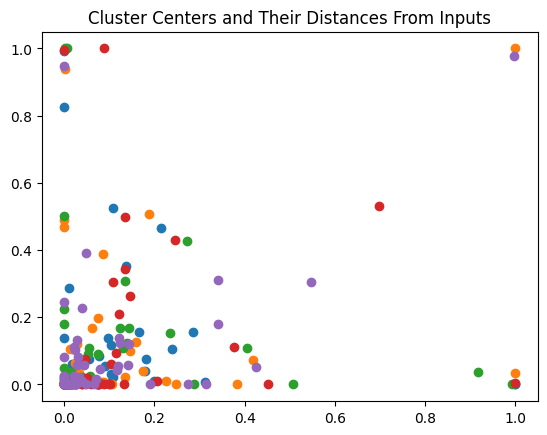

In [115]:
## Author: Arlen Feng
# This program uses the pandas library for data manipulation, NumPy for large matrices, SKLearn (as instructed) for modeling, 
# Matplotlib for plotting, and joblib for pickling. 
import pandas
import numpy
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from joblib import dump, load

# Setting NumPy to print the entire array
numpy.set_printoptions(threshold=numpy.inf)

# Loads and returns a data frame with data loaded from the CSV file
def loadDataIntoDataFrame():
    return pandas.read_csv('XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')

def encodeData():
    # Since the data comes in the form of non-numbers, we use One Hot Encoding to make the data into something easier to understand (e.g. [0, 1, 0, 0] in column 1 means that the student is in Year 2)
    t = (OneHotEncoder().fit_transform(loadDataIntoDataFrame()[['Year']]).toarray(), OneHotEncoder().fit_transform(loadDataIntoDataFrame()[['Major']]).toarray(), OneHotEncoder().fit_transform(loadDataIntoDataFrame()[['University']]).toarray(), OneHotEncoder().fit_transform(loadDataIntoDataFrame()[['Time']]).toarray(), OneHotEncoder().fit_transform(loadDataIntoDataFrame()[['Order']]).toarray())
    transposedT = tuple(zip(*t))
    encodedData = pandas.DataFrame(transposedT, index=loadDataIntoDataFrame().index)
    
    # This is the same data frame although every number is separated into its own cell - for use in the KMeans cluster
    encodedDataWithoutSeparateTuples = pandas.DataFrame(OneHotEncoder().fit_transform(loadDataIntoDataFrame()[['Year', 'Major', 'University', 'Time', 'Order']]).toarray(), index=loadDataIntoDataFrame().index)
    return encodedData, encodedDataWithoutSeparateTuples

# Building and Training the KMeans model
def predict():
    encodedData, encodedDataWithoutSeparateTuples = encodeData()
    # I chose to use 10 clusters because of the volume of inputs from the encoded dataset
    model = KMeans(init='k-means++', n_clusters=10, n_init="auto", max_iter=300, random_state=42)
    model.fit_predict(encodedDataWithoutSeparateTuples)
    return model

# The Final Predictions for the Dataset
def printResults(): 
    # Loads from previous save or using the predict() method for the first time
    try:
        model = load('Model.joblib')
        print('Loaded from previous save')
    except:
        model = predict()
        print('Loaded for the first time')

    # Prints final statistics for the model
    print('Distance of Samples to the Cluster Center: ', end='')
    print(model.inertia_)
    print('\nThe Number of Iterations Required to Converge: ', end='')
    print(model.n_iter_)
    print('\nFinal Locations of the Centroid: ', end='')
    print(model.cluster_centers_)
    print('\nThe Cluster Labels: ', end='')
    print(model.labels_)

    pyplot.figure(1)
    pyplot.title('Cluster Centers and Their Distances From Inputs')
    pyplot.scatter(model.cluster_centers_[0], model.cluster_centers_[1])
    pyplot.scatter(model.cluster_centers_[2], model.cluster_centers_[3])
    pyplot.scatter(model.cluster_centers_[4], model.cluster_centers_[5])
    pyplot.scatter(model.cluster_centers_[6], model.cluster_centers_[7])
    pyplot.scatter(model.cluster_centers_[8], model.cluster_centers_[9])

    # Saves to "Model.joblib"
    dump(model, 'Model.joblib')

printResults()
